In [47]:
#IMPORT OF PACKAGES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
#MASH Exciton Data

#Create column names for df
column_names = ["Time"]
excitation_data_path = "Data/mash_exc300K.dat"
for i in range(1,8):
    column_names.append(str(i))

#Import MASH Exciton Data as df, and skip every 50 to align dataset with least squares data set
exciton_df = pd.read_csv(excitation_data_path, delimiter=" ", names=column_names)
#df = df[df["Time"]<=4000]
#df = df[df["Time"]>500]
exciton_time_df = exciton_df[(exciton_df.index % 50 == 0) | (exciton_df.index == len(exciton_df) - 1)].iloc[:,0]
exciton_time_df.reset_index(drop=True,inplace=True)

In [49]:
#Import MASH exciton least squares optimized data
excitation_data_ls_path = "exc_ls.dat"
exciton_column_name_ls = ["1_ls","2_ls","3_ls","4_ls","5_ls","6_ls","7_ls"]
exciton_ls_df = pd.read_csv(excitation_data_ls_path,delimiter="\t", names = exciton_column_name_ls)
exciton_ls_df = pd.concat([exciton_time_df,exciton_ls_df], axis=1)

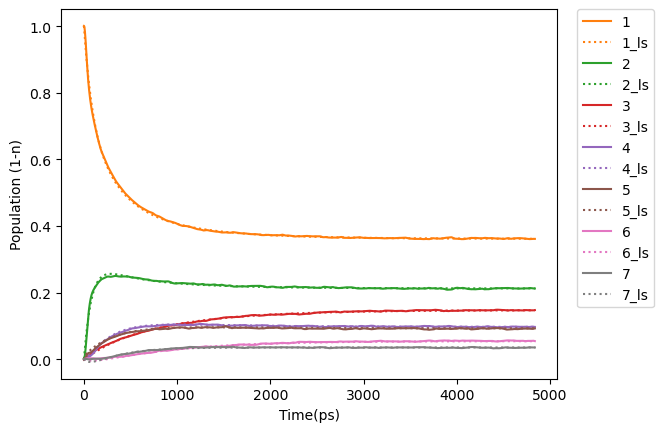

In [50]:
for i, column_name in enumerate(column_names[1:], start=1):
    c = "C%i"%i
    plt.plot(exciton_df["Time"], exciton_df[column_name],"-", label=column_name, color=c)
    plt.plot(exciton_ls_df.iloc[:,0],exciton_ls_df.iloc[:,i], ":", label=exciton_column_name_ls[i-1],color=c)

plt.xlabel("Time(ps)")
plt.ylabel("Population (1-n)")
plt.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)

plt.show()

In [69]:
#Import Site Data
site_data_path = "Data/mash_site300K.dat"
column_names = ["Time","1","2","3","4","5","6","7"] #Over Time in ps
site_df = pd.read_csv(site_data_path,delimiter=" ",names=column_names)
time_t = site_df["Time"].values
delta_t = time_t[1]-time_t[0]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


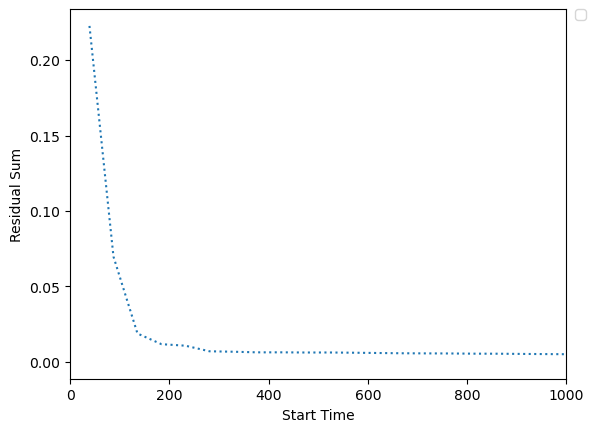

In [103]:
#Plotting site data 
plt.plot(residual_df["Start Time"],residual_df["Residual"],":")

plt.xlabel("Start Time")
plt.ylabel("Residual Sum")
plt.xlim(0,1000)
plt.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)
plt.show()

In [104]:
#Import least squares optimized site data
site_data_ls_path = "site_ls.dat"
column_name_ls = ["1","2","3","4","5","6","7"] #Over Time in ps
site_ls_df = pd.read_csv(site_data_path,delimiter="\t",names=column_names)

In [105]:
#Time Data used in Final Calculation
site_time_df = site_df
site_time_df =site_time_df[site_time_df["Time"]>=5e+02]
site_time_df = site_time_df[(site_time_df.index % 30 == 0) | (site_time_df.index == len(site_df) - 1)].iloc[:,0]
site_time_df.reset_index(drop=True,inplace=True)
#Import MASH Site least squares optimized data
site_data_ls_path = "site_ls.dat"
site_column_name_ls = ["1_ls","2_ls","3_ls","4_ls","5_ls","6_ls","7_ls"]
site_ls_df = pd.read_csv(site_data_ls_path,delimiter="\t", names = site_column_name_ls)
site_ls_df = pd.concat([site_time_df,site_ls_df], axis=1)

In [114]:
column_names_test = ["Time","1_ls","2_ls","3_ls","4_ls","5_ls","6_ls","7_ls"]
site_test_df = site_ls_df = pd.read_csv("site_function_test.dat",delimiter="\t",names=column_names_test)
site_test_df.head()

,Time,1_ls,2_ls,3_ls,4_ls,5_ls,6_ls,7_ls
0,464.425941,0.411357,0.265194,0.140807,0.083394,0.047256,0.015400,0.036592
1,478.939251,0.406562,0.262033,0.144525,0.085667,0.047912,0.015674,0.037627
2,493.452562,0.401839,0.258936,0.148136,0.087877,0.048572,0.015959,0.038681
3,507.965872,0.397189,0.255901,0.151646,0.090028,0.049235,0.016252,0.039749
4,522.479183,0.392613,0.252926,0.155059,0.092126,0.049897,0.016554,0.040825


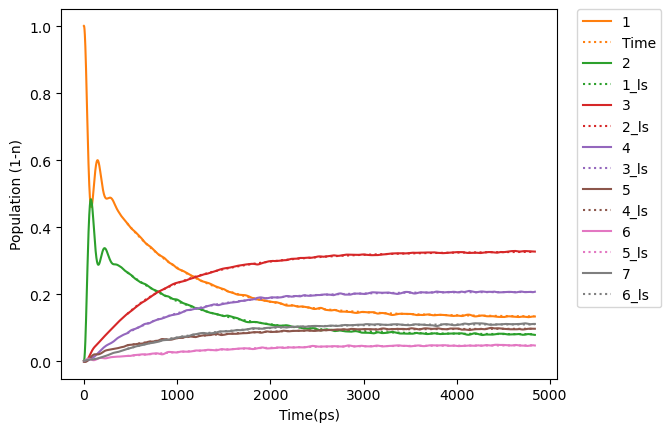

In [115]:
for i, column_name in enumerate(column_names[1:], start=1):
    c = "C%i"%i
    plt.plot(site_df["Time"],site_df[column_name],"-", label=column_name, color=c)
    plt.plot(site_test_df["Time"],site_test_df.iloc[:,i], ":", label=site_column_name_ls[i-1],color=c)

plt.xlabel("Time(ps)")
plt.ylabel("Population (1-n)")
plt.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)

plt.show()